ALEXNET


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torch.utils.data import DataLoader, Subset
from torchvision.datasets import SVHN
from sklearn.metrics import f1_score
import numpy as np


In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_data_full = SVHN(root='./data', split='train', download=True, transform=transform)
test_data_full = SVHN(root='./data', split='test', download=True, transform=transform)

subset_indices_train = np.random.choice(len(train_data_full), int(len(train_data_full) * 0.25), replace=False)
subset_indices_test = np.random.choice(len(test_data_full), int(len(test_data_full) * 0.25), replace=False)

train_data = Subset(train_data_full, subset_indices_train)
test_data = Subset(test_data_full, subset_indices_test)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)


100%|██████████| 182040794/182040794 [00:05<00:00, 30750634.05it/s]


100%|██████████| 64275384/64275384 [00:03<00:00, 17985146.93it/s]


In [ ]:
alexnet = models.alexnet(pretrained=True)
alexnet.classifier[6] = nn.Linear(4096, 10)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
alexnet.to(device)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 119MB/s]


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(alexnet.parameters(), lr=0.001)


In [ ]:
num_epochs = 10

for epoch in range(num_epochs):
    alexnet.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = alexnet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

print('Finished Training')


Epoch 1, Loss: 2.261521296218713
Epoch 2, Loss: 2.24397593175908
Epoch 3, Loss: 2.2429388242316164
Epoch 4, Loss: 2.2420737643690476
Epoch 5, Loss: 2.2422098025212303
Epoch 6, Loss: 2.242847868789779
Epoch 7, Loss: 2.2420169459818133
Epoch 8, Loss: 2.2418157099016036
Epoch 9, Loss: 2.2414872164510267
Epoch 10, Loss: 2.241534146697679
Finished Training


In [ ]:
alexnet.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = alexnet(images)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

f1 = f1_score(y_true, y_pred, average='macro')
print(f'F1 Score of the network on the test images: {f1}')


F1 Score of the network on the test images: 0.032613168724279835


LENET-5

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset
from torchvision.datasets import SVHN
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import f1_score
import numpy as np


In [ ]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

train_data_full = SVHN(root='./data', split='train', download=True, transform=transform)
test_data_full = SVHN(root='./data', split='test', download=True, transform=transform)

subset_indices_train = np.random.choice(len(train_data_full), int(len(train_data_full) * 0.25), replace=False)
subset_indices_test = np.random.choice(len(test_data_full), int(len(test_data_full) * 0.25), replace=False)

train_data = Subset(train_data_full, subset_indices_train)
test_data = Subset(test_data_full, subset_indices_test)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)


Using downloaded and verified file: ./data/train_32x32.mat
Using downloaded and verified file: ./data/test_32x32.mat


In [ ]:
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

lenet5 = LeNet5()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
lenet5.to(device)


LeNet5(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(lenet5.parameters(), lr=0.001)


In [ ]:
num_epochs = 10

for epoch in range(num_epochs):
    lenet5.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = lenet5(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

print('Finished Training')


Epoch 1, Loss: 1.9149828187679996
Epoch 2, Loss: 0.824924253628229
Epoch 3, Loss: 0.5983392911920979
Epoch 4, Loss: 0.5056512654346872
Epoch 5, Loss: 0.44937985148994763
Epoch 6, Loss: 0.40755868165750536
Epoch 7, Loss: 0.3703799912323104
Epoch 8, Loss: 0.3424770115300338
Epoch 9, Loss: 0.3135394052917118
Epoch 10, Loss: 0.29156724298664916
Finished Training


In [ ]:
lenet5.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = lenet5(images)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

f1 = f1_score(y_true, y_pred, average='macro')
print(f'F1 Score of the network on the test images: {f1}')


F1 Score of the network on the test images: 0.8310482088966923


VGG-16

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset
from torchvision.datasets import SVHN
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import f1_score
import numpy as np


In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_data_full = SVHN(root='./data', split='train', download=True, transform=transform)
test_data_full = SVHN(root='./data', split='test', download=True, transform=transform)

subset_indices_train = np.random.choice(len(train_data_full), int(len(train_data_full) * 0.25), replace=False)
subset_indices_test = np.random.choice(len(test_data_full), int(len(test_data_full) * 0.25), replace=False)

train_data = Subset(train_data_full, subset_indices_train)
test_data = Subset(test_data_full, subset_indices_test)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)


Using downloaded and verified file: ./data/train_32x32.mat
Using downloaded and verified file: ./data/test_32x32.mat


In [ ]:
vgg16 = models.vgg16(pretrained=True)


vgg16.classifier[6] = nn.Linear(vgg16.classifier[6].in_features, 10)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vgg16.to(device)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:04<00:00, 134MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg16.parameters(), lr=0.001)


In [ ]:
num_epochs = 10

for epoch in range(num_epochs):
    vgg16.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = vgg16(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

print('Finished Training')


Epoch 1, Loss: 2.2589390088542385
Epoch 2, Loss: 2.241546790637271
Epoch 3, Loss: 2.240274546242093
Epoch 4, Loss: 2.238152712427509
Epoch 5, Loss: 2.2385414886641044
Epoch 6, Loss: 2.2371705556207093
Epoch 7, Loss: 2.2378054135340877
Epoch 8, Loss: 2.2377621245425825
Epoch 9, Loss: 2.2377665885455946
Epoch 10, Loss: 2.2367700211456727
Finished Training


In [ ]:
vgg16.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = vgg16(images)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

f1 = f1_score(y_true, y_pred, average='macro')
print(f'F1 Score of the network on the test images: {f1}')


F1 Score of the network on the test images: 0.06345053429170527


RESNET-18

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset
from torchvision.datasets import SVHN
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import f1_score
import numpy as np


In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_data_full = SVHN(root='./data', split='train', download=True, transform=transform)
test_data_full = SVHN(root='./data', split='test', download=True, transform=transform)

subset_indices_train = np.random.choice(len(train_data_full), int(len(train_data_full) * 0.25), replace=False)
subset_indices_test = np.random.choice(len(test_data_full), int(len(test_data_full) * 0.25), replace=False)

train_data = Subset(train_data_full, subset_indices_train)
test_data = Subset(test_data_full, subset_indices_test)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)


100%|██████████| 182040794/182040794 [00:04<00:00, 38281480.71it/s]


100%|██████████| 64275384/64275384 [00:01<00:00, 40697949.17it/s]


In [ ]:
resnet18 = models.resnet18(pretrained=True)


resnet18.fc = nn.Linear(resnet18.fc.in_features, 10)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet18.to(device)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 160MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet18.parameters(), lr=0.001)


In [ ]:
num_epochs = 10

for epoch in range(num_epochs):
    resnet18.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = resnet18(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

print('Finished Training')


Epoch 1, Loss: 0.5688363812980851
Epoch 2, Loss: 0.31835718557602655
Epoch 3, Loss: 0.26322105901403575
Epoch 4, Loss: 0.2261971045134306
Epoch 5, Loss: 0.18965918688188074
Epoch 6, Loss: 0.14422098126499727
Epoch 7, Loss: 0.13094492931159482
Epoch 8, Loss: 0.10170914818261333
Epoch 9, Loss: 0.09002261170148314
Epoch 10, Loss: 0.06585662400802633
Finished Training


In [ ]:
resnet18.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = resnet18(images)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

f1 = f1_score(y_true, y_pred, average='macro')
print(f'F1 Score of the network on the test images: {f1}')


F1 Score of the network on the test images: 0.929175055247549


RESNET-50

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset
from torchvision.datasets import SVHN
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import f1_score
import numpy as np


In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_data_full = SVHN(root='./data', split='train', download=True, transform=transform)
test_data_full = SVHN(root='./data', split='test', download=True, transform=transform)

subset_indices_train = np.random.choice(len(train_data_full), int(len(train_data_full) * 0.25), replace=False)
subset_indices_test = np.random.choice(len(test_data_full), int(len(test_data_full) * 0.25), replace=False)

train_data = Subset(train_data_full, subset_indices_train)
test_data = Subset(test_data_full, subset_indices_test)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)


Using downloaded and verified file: ./data/train_32x32.mat
Using downloaded and verified file: ./data/test_32x32.mat


In [ ]:

resnet50 = models.resnet50(pretrained=True)
resnet50.fc = nn.Linear(resnet50.fc.in_features, 10)
resnet50.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet50.parameters(), lr=0.001)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 89.6MB/s]


In [ ]:
num_epochs = 10

for epoch in range(num_epochs):
    resnet50.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = resnet50(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

print('Finished Training')


Epoch 1, Loss: 0.1474949276982116
Epoch 2, Loss: 0.12120436064217949
Epoch 3, Loss: 0.11478619175568144
Epoch 4, Loss: 0.0922393358373904
Epoch 5, Loss: 0.10100435560270916
Epoch 6, Loss: 0.07923400851680099
Epoch 7, Loss: 0.06392961704929198
Epoch 8, Loss: 0.054561494902649124
Epoch 9, Loss: 0.05575717256180365
Epoch 10, Loss: 0.06132298030194521
Finished Training


In [ ]:
resnet50.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = resnet50(images)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

f1 = f1_score(y_true, y_pred, average='macro')
print(f'F1 Score of the network on the test images: {f1}')


F1 Score of the network on the test images: 0.9239145583115995


RESNET-101

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset
from torchvision.datasets import SVHN
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import f1_score
import numpy as np


In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_data_full = SVHN(root='./data', split='train', download=True, transform=transform)
test_data_full = SVHN(root='./data', split='test', download=True, transform=transform)

subset_indices_train = np.random.choice(len(train_data_full), int(len(train_data_full) * 0.25), replace=False)
subset_indices_test = np.random.choice(len(test_data_full), int(len(test_data_full) * 0.25), replace=False)

train_data = Subset(train_data_full, subset_indices_train)
test_data = Subset(test_data_full, subset_indices_test)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)


100%|██████████| 182040794/182040794 [00:04<00:00, 43839168.23it/s]


100%|██████████| 64275384/64275384 [00:02<00:00, 32006079.02it/s]


In [ ]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet101 = models.resnet101(pretrained=True)
resnet101.fc = nn.Linear(resnet101.fc.in_features, 10)
resnet101.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet101.parameters(), lr=0.001)


In [ ]:
num_epochs = 10

for epoch in range(num_epochs):
    resnet101.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = resnet101(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

print('Finished Training')


Epoch 1, Loss: 2.2624169313470732
Epoch 2, Loss: 2.233730837936801
Epoch 3, Loss: 2.2319924146925176
Epoch 4, Loss: 2.165173350620436
Epoch 5, Loss: 1.3959651833325364
Epoch 6, Loss: 0.5771276571675745
Epoch 7, Loss: 0.4001978860215575
Epoch 8, Loss: 0.33705174419086226
Epoch 9, Loss: 0.30024609121170553
Epoch 10, Loss: 0.263626370257186
Finished Training


In [ ]:
resnet101.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = resnet101(images)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

f1 = f1_score(y_true, y_pred, average='macro')
print(f'F1 Score of the network on the test images: {f1}')


F1 Score of the network on the test images: 0.920626177590429


In [ ]:
pip install matplotlib


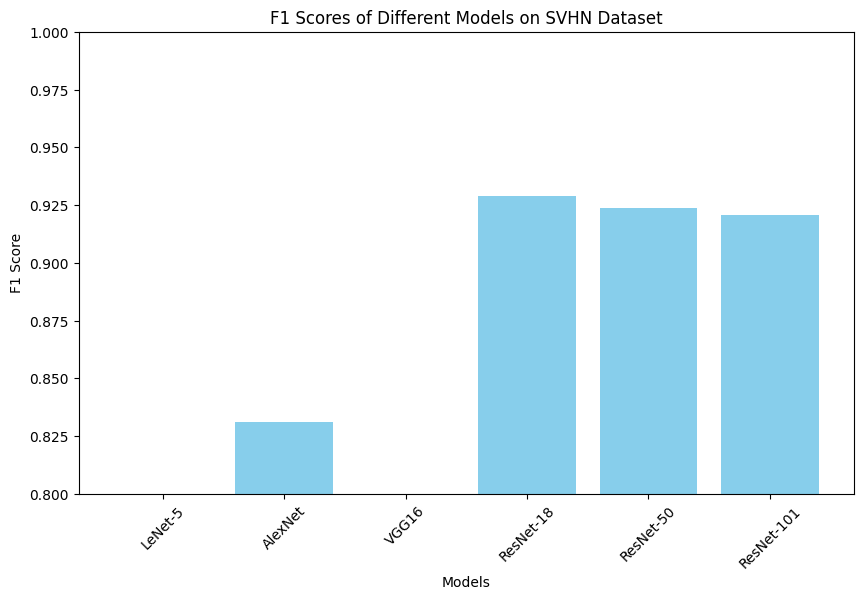

In [ ]:
import matplotlib.pyplot as plt
models = ['LeNet-5', 'AlexNet', 'VGG16', 'ResNet-18', 'ResNet-50','ResNet-101']

f1_scores = [0.032613168724279835, 0.8310482088966923, 0.06345053429170527,0.929175055247549, 0.9239145583115995,0.920626177590429]

plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Scores of Different Models on SVHN Dataset')
plt.ylim(0.8, 1.0)
plt.xticks(models, rotation=45)
plt.show()
